In [197]:
import numpy as np
import hist
import matplotlib.pyplot as plt
import mplhep as hep
from wremnants import plot_tools, theory_tools
from utilities import boostHistHelpers as hh,input_tools
import uproot
import pickle
import glob

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
from narf import ioutils
ioutils

<module 'narf.ioutils' from '/home/k/kelong/work/WRemnants/narf/narf/ioutils.py'>

In [222]:
genfile = "/scratch/kelong/Analysis/w_z_gen_dists.hdf5"
minnlo_wm = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_wm_pdf = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen_pdfMSHT20", calculate_lumi=False, scale=1)
minnlo_wm_pdfas = input_tools.read_and_scale(genfile, "WminusmunuPostVFP", "nominal_gen_pdfMSHT20alphaS002", calculate_lumi=False, scale=1)
minnlo_wp = input_tools.read_and_scale(genfile, "WplusmunuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z = input_tools.read_and_scale(genfile, "ZmumuPostVFP", "nominal_gen", calculate_lumi=False, scale=1)
minnlo_z_pdf = input_tools.read_and_scale(genfile, "ZmumuPostVFP", "nominal_gen_pdfMSHT20", calculate_lumi=False, scale=1)

In [17]:
scetlib_n3ll_wm = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", nonsing="")

In [58]:
scetlib_n3ll_z = input_tools.read_scetlib_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_oldnp = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/matchFO/Z/inclusive_Z_MSHT20.pkl", nonsing="")
scetlib_n3ll_z_other = input_tools.read_scetlib_hist("/home/k/kelong/work/Generators/scetlib-cms/prod/scetlib_run/helicityTest/Z_vars/inclusive_Z_MSHT20_N3LL_NP.pkl", nonsing="")

In [52]:
minnlo_z_pt, scetlib_n3ll_z_pt, scetlib_n3ll_z_oldnp_pt, scetlib_n3ll_z_other_pt = hh.rebinHistsToCommon([minnlo_z.project("ptVgen"), scetlib_n3ll_z.project("qT", "vars"), scetlib_n3ll_z_oldnp[{"vars" : 0}].project("qT"), scetlib_n3ll_z_other[{"vars" : 0}].project("qT")], 0)


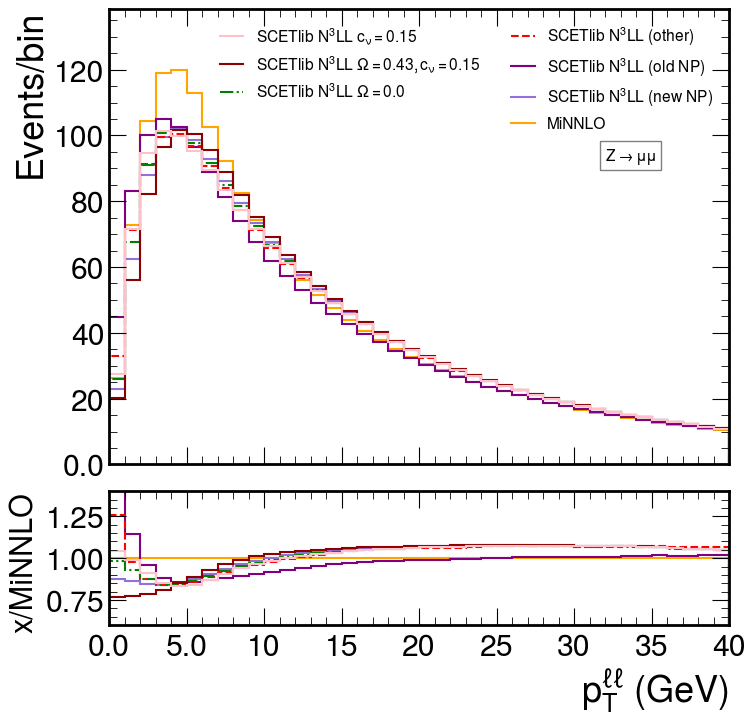

In [60]:
fig = plot_tools.makePlotWithRatioToRef(
            [minnlo_z_pt,
                 scetlib_n3ll_z_pt[{"vars" : "central"}],
                 scetlib_n3ll_z_oldnp_pt,
                 scetlib_n3ll_z_other_pt,
                 scetlib_n3ll_z_pt[{"vars" : "Omega0."}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu-0.15-omega_nu0.43'}],
                 scetlib_n3ll_z_pt[{"vars" : 'c_nu0.05'}],
            ],
            ["MiNNLO", "SCETlib N$^{3}$LL (new NP)", "SCETlib N$^{3}$LL (old NP)", 
             "SCETlib N$^{3}$LL (other)", 
             r"SCETlib N$^{3}$LL $\Omega = 0.0$", 
             r"SCETlib N$^{3}$LL $\Omega = 0.43, c_{\nu} = 0.15$",
            r"SCETlib N$^{3}$LL $c_{\nu} = 0.15$"
            ],
            colors=["orange", "mediumpurple", "purple", "red", "green", "darkred", "pink"], 
            linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/MiNNLO",
            legtext_size=16,
            rrange=[0.6, 1.4],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, extra_text=r"$Z\rightarrow\mu\mu$")

In [87]:
scetlib_new = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_tnp_combined.pkl", "rb"))

In [224]:
scetlibZ_pdf = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl", "rb"))["hist"]

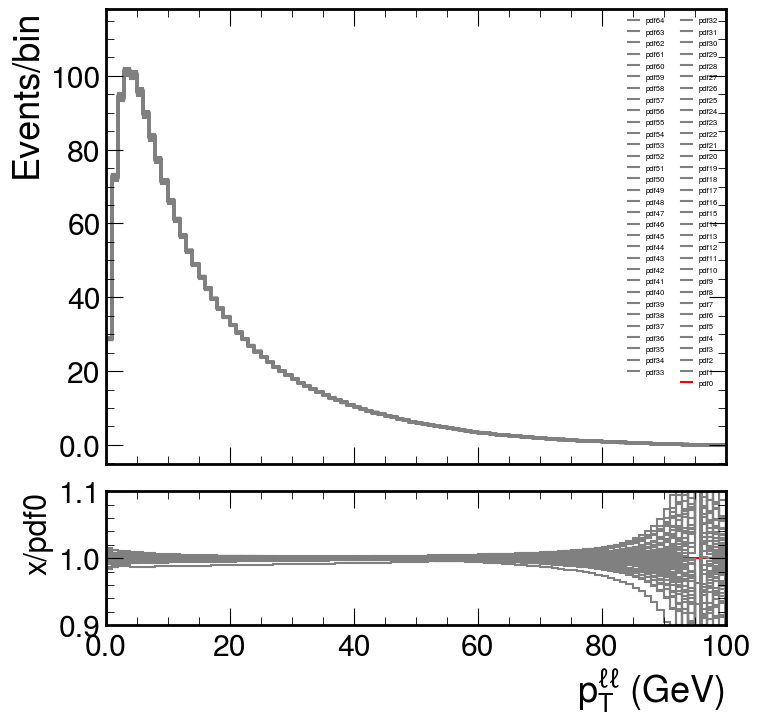

In [225]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : x}].project("qT") for x in scetlibZ_pdf.axes["vars"]
            ],
            labels=list(scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

Text(0.5, 1.0, 'SCETlib')

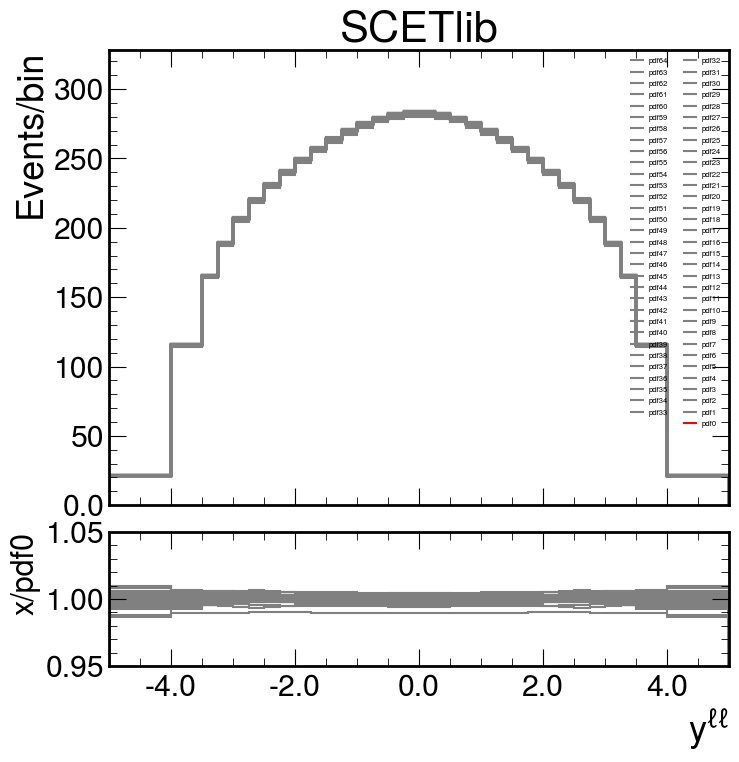

In [231]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibZ_pdf[{"vars" : x}].project("Y") for x in scetlibZ_pdf.axes["vars"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib")

In [96]:
scetlib_pdf[{"vars" : "pdf0"}].project("Y")

Hist(Variable(array([-5.  , -4.  , -3.5 , -3.25, -3.  , -2.75, -2.5 , -2.25, -2.  ,
       -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,
        0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,
        2.75,  3.  ,  3.25,  3.5 ,  4.  ,  5.  ]), name='Y'), storage=Weight()) # Sum: WeightedSum(value=1463.62, variance=1.601e-05)

In [125]:
scetlibWm_pdf = pickle.load(open("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Wm_MSHT20_NP0_PDFVars_combined.pkl", "rb"))["hist"]

Text(0.5, 1.0, 'SCETlib')

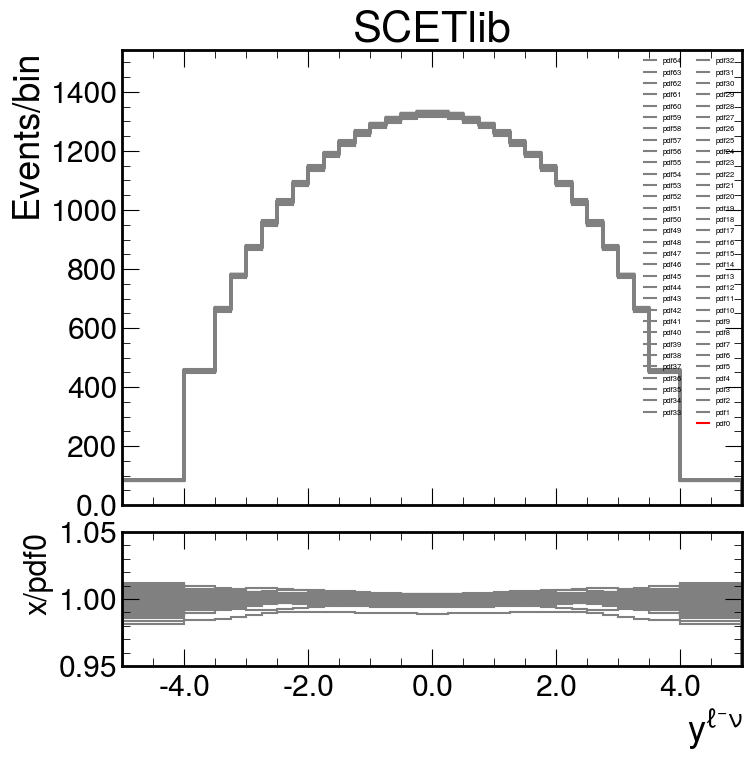

In [164]:
s = hist.tag.Slicer()
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibWm_pdf[{"vars" : x}].project("Y") for x in scetlib_pdf.axes["vars"]
            ],
            labels=list(scetlibWm_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibWm_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("SCETlib")

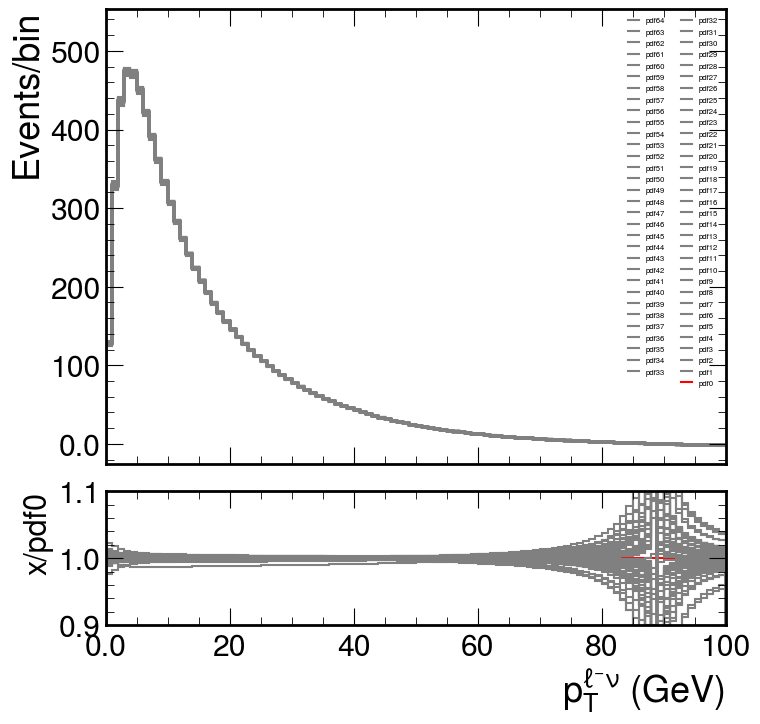

In [142]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                scetlibWm_pdf[{"vars" : x}].project("qT") for x in scetlib_pdf.axes["vars"]
            ],
            labels=list(scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"p$_{T}^{\ell^{-}\nu}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)

Text(0.5, 1.0, 'MiNNLO')

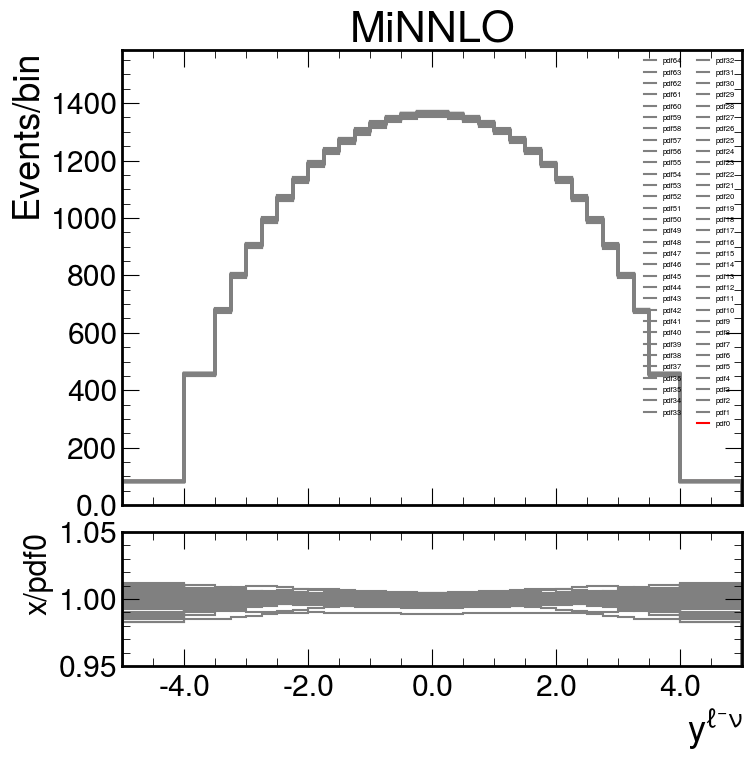

In [227]:
s = hist.tag.Slicer()
minnlo_wm_pdf_rebin = hh.rebinHist(minnlo_wm_pdf, "y", scetlibWm_pdf.axes["Y"].edges)
fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_wm_pdf_rebin[{"pdfVar" : x}].project("y") for x in minnlo_wm_pdf.axes["pdfVar"]
            ],
            labels=list(scetlibWm_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibWm_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

Text(0.5, 1.0, 'MiNNLO')

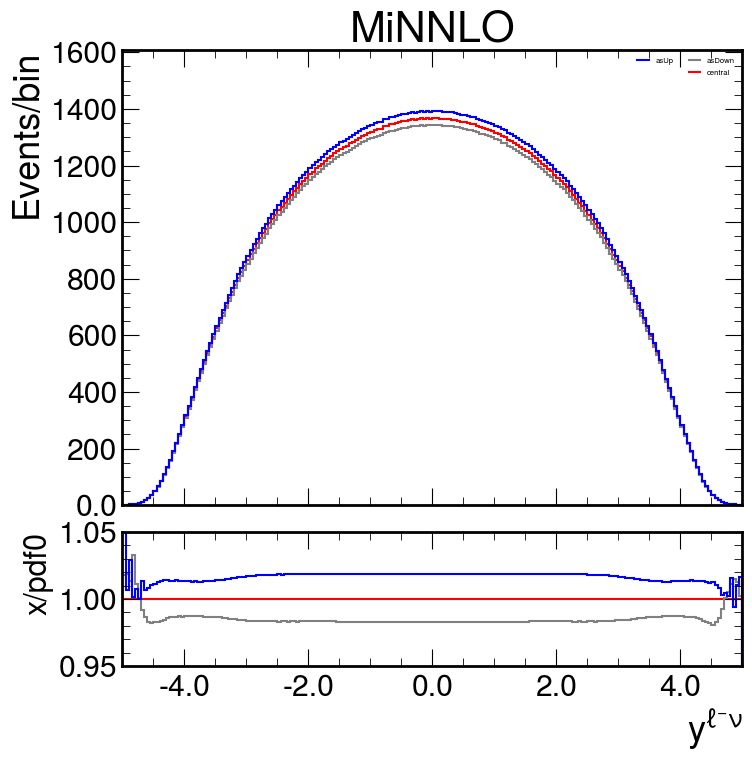

In [195]:

fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_wm_pdf[{"pdfVar" : 0}].project("y"),
                minnlo_wm_pdfas[{"alphasVar" : "as0116"}].project("y"),
                minnlo_wm_pdfas[{"alphasVar" : "as0120"}].project("y"),
            ],
            labels=["central", "asDown", "asUp"],
            colors=["red", "grey", "blue"], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell^{-}\nu}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

In [201]:
pdf_hists = []
for f in glob.glob("/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/*txt"):
    pdf_hists.append(input_tools.read_dyturbo_hist([f], axes=("Y", "qT")))

In [203]:
pdf_hists[0].shape

(40, 100)

In [217]:
def read_dyturbo_pdf_hists(base_name, pdf_members, axes):
    pdf_ax = hist.axis.StrCategory([f"pdf{i}" for i in range(pdf_members)], name="vars")
    pdf_hist = None
    
    for i in range(pdf_members):
        h = input_tools.read_dyturbo_hist([base_name.format(i=i)], axes=axes)
        if not pdf_hist:
            pdf_hist = hist.Hist(*h.axes, pdf_ax, storage=h._storage_type())
        pdf_hist[...,pdf_ax.index(f"pdf{i}")] = h.view(flow=True)
        
    return pdf_hist

In [239]:
dyturboZ_pdf = input_tools.read_dyturbo_pdf_hists("/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/results_z-2d-nnlo-vj-member{i}-scetlibmatch.txt",
                    pdf_members=65, axes=("Y", "qT"), charge=0)

ValueError: Must pass in a valid file

Text(0.5, 1.0, 'DYTurbo')

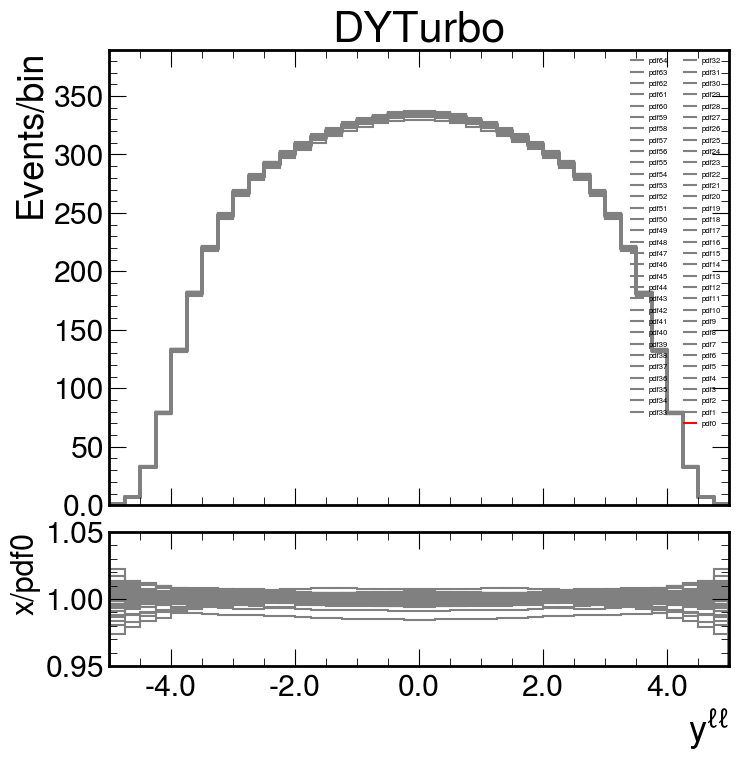

In [220]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturboZ_pdf[{"vars" : x}].project("Y") for x in dyturboZ_pdf.axes["vars"]
            ],
            labels=list(dyturboZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturboZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo")

In [235]:
all("pdf" in x for x in scetlibZ_pdf.axes["vars"])

True

Text(0.5, 1.0, 'MiNNLO')

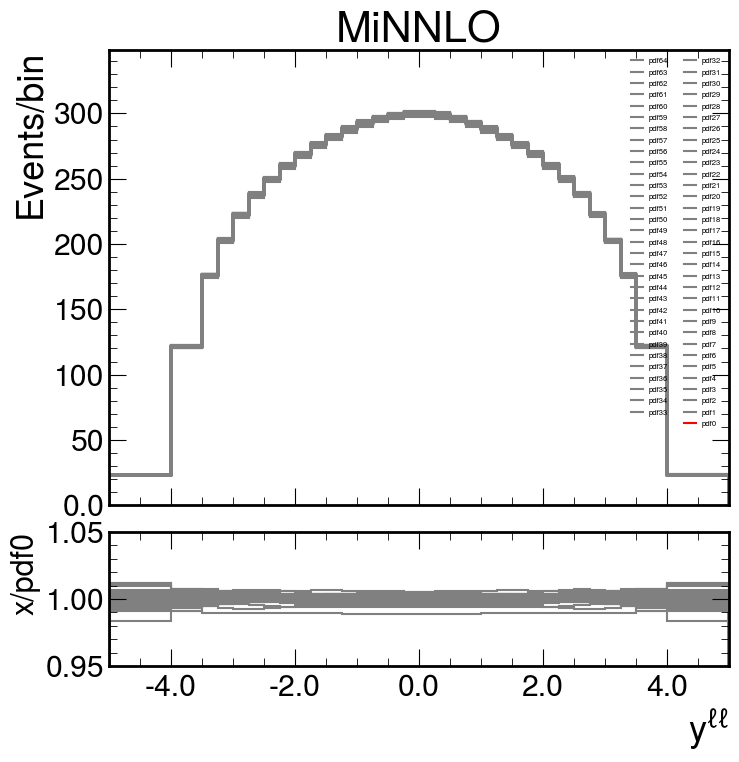

In [230]:
s = hist.tag.Slicer()
minnlo_z_pdf_rebin = hh.rebinHist(minnlo_z_pdf, "y", scetlibZ_pdf.axes["Y"].edges)
fig = plot_tools.makePlotWithRatioToRef(
            [
                minnlo_z_pdf_rebin[{"pdfVar" : x}].project("y") for x in minnlo_wm_pdf.axes["pdfVar"]
            ],
            labels=list(scetlibZ_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(scetlibZ_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("MiNNLO")

In [247]:
dyturbo_scetlib_pdf = input_tools.read_matched_scetlib_dyturbo_hist("/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_combined.pkl",
    "/scratch/shared/TheoryPredictions/ScetlibFiles/inclusive_Z_MSHT20_NP0_nnlo_sing_combined.pkl",
    "/scratch/shared/TheoryPredictions/DYTurbo/Z/msht20nnlo/pdfvars/results_z-2d-nnlo-vj-member{i}-scetlibmatch.txt",
    axes=("Y", "qT"),                            
)

Text(0.5, 1.0, 'DYTurbo+SCETlib')

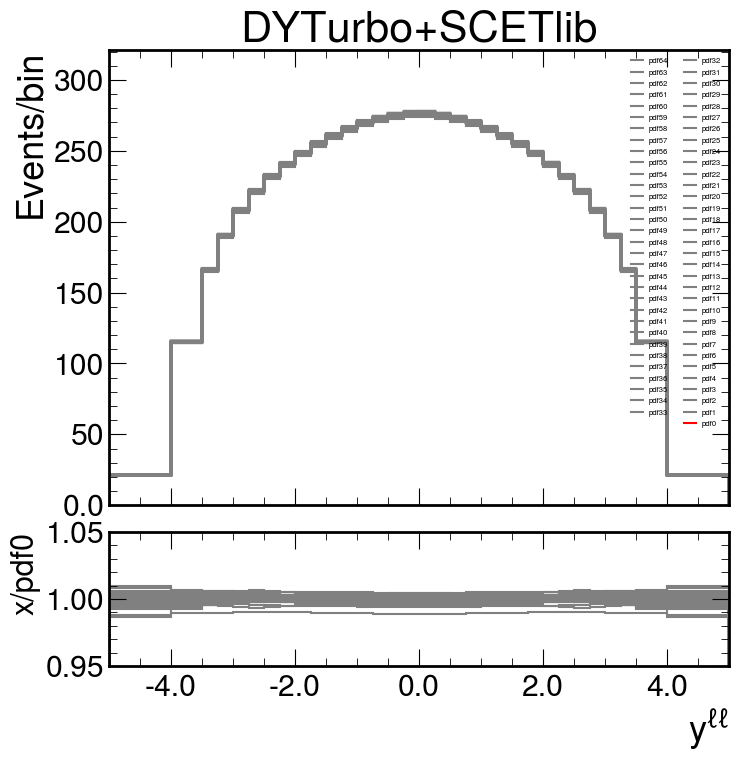

In [248]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                dyturbo_scetlib_pdf[{"vars" : x}].project("Y") for x in dyturbo_scetlib_pdf.axes["vars"]
            ],
            labels=list(dyturbo_scetlib_pdf.axes["vars"]),
            colors=["red"]+(["grey"]*len(dyturbo_scetlib_pdf.axes["vars"]))[:-1], 
            #linestyles=["solid", "solid", "solid", "dashed", "dashdot", "solid", "solid"],
            xlabel=r"$y^{\ell\ell}$", 
            ylabel="Events/bin",
            rlabel="x/pdf0",
            legtext_size=8,
            rrange=[0.95, 1.05],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True)
fig.get_axes()[0].set_title("DYTurbo+SCETlib")

In [249]:
import lz4.frame
res = pickle.load(lz4.frame.open("/home/k/kelong/work/WRemnants/utilities/../wremnants/data//TheoryCorrections/scetlib_dyturboMSHT20UncCorrZ.pkl.lz4"))

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f841c19faf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

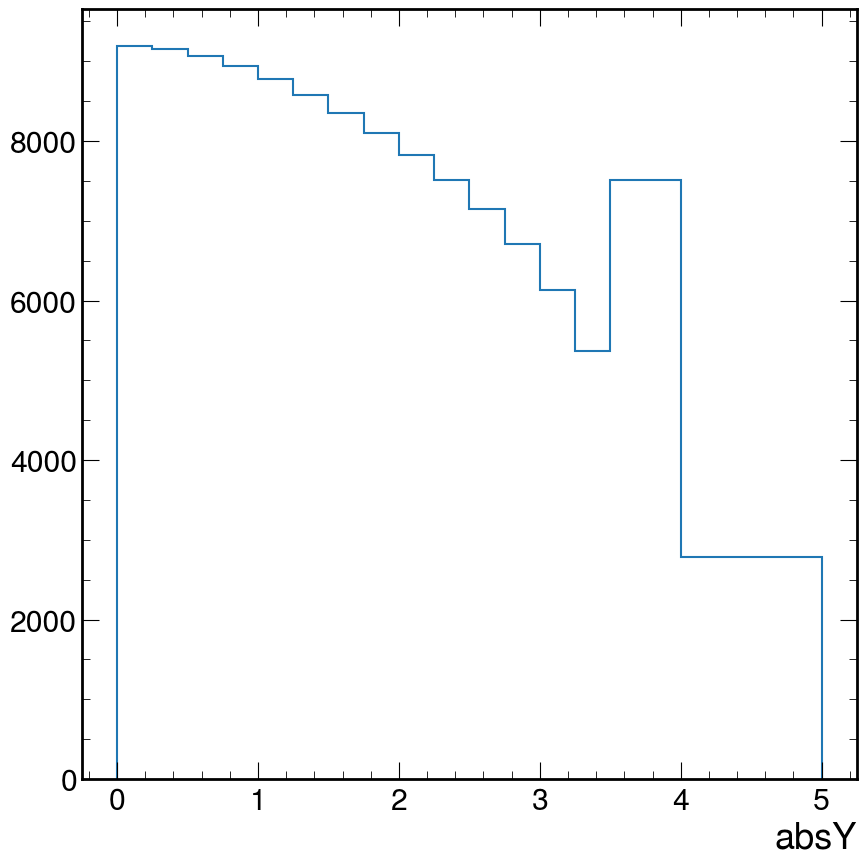

In [258]:
res["Z"]["scetlib_dyturboMSHT20Unc_hist"].project("absY").plot()

In [268]:
res["Z"]["minnlo_ref_hist"].sum()

WeightedSum(value=2260.81, variance=0.0241296)

In [270]:
res["Z"]["scetlib_dyturboMSHT20Unc_hist"][{"vars" : 0}].sum()

WeightedSum(value=1864.03, variance=2.13394e-05)